In [1]:
!pip install yfinance seaborn scikit-learn


In [2]:
%matplotlib inline
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Wipro stock symbol on NSE is "WIPRO.NS"
df = yf.download("WIPRO.NS", start="2024-08-14", end="2025-08-14")
print(df.head())
print("\nShape of data:", df.shape)


C:\Users\ved23\AppData\Local\Temp\ipykernel_9356\3673881195.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("WIPRO.NS", start="2024-08-14", end="2025-08-14")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker        WIPRO.NS    WIPRO.NS    WIPRO.NS    WIPRO.NS  WIPRO.NS
Date                                                                
2024-08-14  238.068619  238.885986  235.808863  237.034900  11121756
2024-08-16  248.213531  248.790499  239.414879  240.881316  25931140
2024-08-19  249.896317  251.555086  246.987476  248.093313  11466562
2024-08-20  252.252243  253.670582  249.848238  249.968438   9543812
2024-08-21  253.069595  253.910997  250.521356  251.651256   6454402

Shape of data: (250, 5)


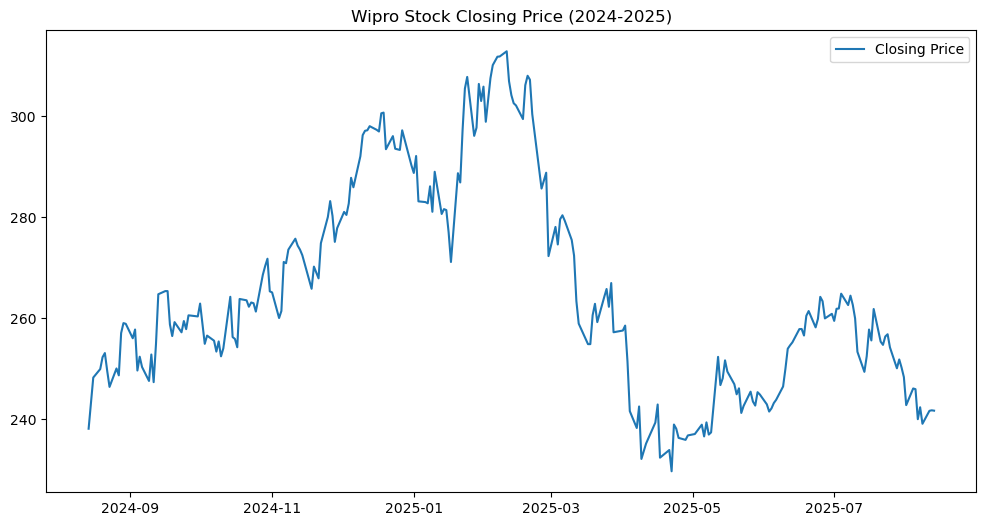

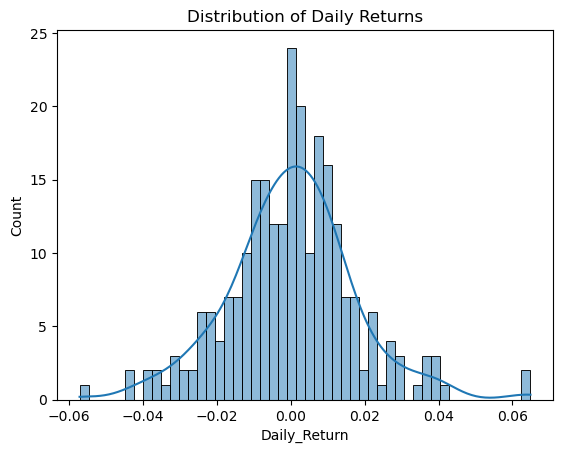

In [4]:
# Closing price chart
plt.figure(figsize=(12,6))
plt.plot(df["Close"], label="Closing Price")
plt.title("Wipro Stock Closing Price (2024-2025)")
plt.legend()
plt.show()

# Daily returns
df["Daily_Return"] = df["Close"].pct_change()
sns.histplot(df["Daily_Return"].dropna(), bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.show()


In [5]:
# Moving Averages
df["MA20"] = df["Close"].rolling(20).mean()
df["MA50"] = df["Close"].rolling(50).mean()

# Target: 1 if next day return > 0 else 0
df["Target"] = np.where(df["Daily_Return"].shift(-1) > 0, 1, 0)

# Drop missing values
df.dropna(inplace=True)

df.head()


Price,Close,High,Low,Open,Volume,Daily_Return,MA20,MA50,Target
Ticker,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS,,,,
Date,,,,,,,,,
2024-10-24,262.950073,264.680945,262.108672,263.094308,9576604,-0.000548,258.626470,255.923647,0
2024-10-25,261.291321,265.402164,259.872952,264.320361,10124540,-0.006308,258.663732,256.388102,1
2024-10-28,268.575439,269.152407,260.930721,261.291322,11185858,0.027877,259.067605,256.795340,1
2024-10-29,270.306335,270.883303,266.003161,269.152401,12055630,0.006445,259.566436,257.203540,1
2024-10-30,271.772766,278.263580,269.777430,270.450563,20755492,0.005425,260.011176,257.593951,0


In [6]:
features = ["MA20", "MA50", "Daily_Return"]
X = df[features]
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [7]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.7073170731707317

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        22
           1       0.73      0.58      0.65        19

    accuracy                           0.71        41
   macro avg       0.71      0.70      0.70        41
weighted avg       0.71      0.71      0.70        41



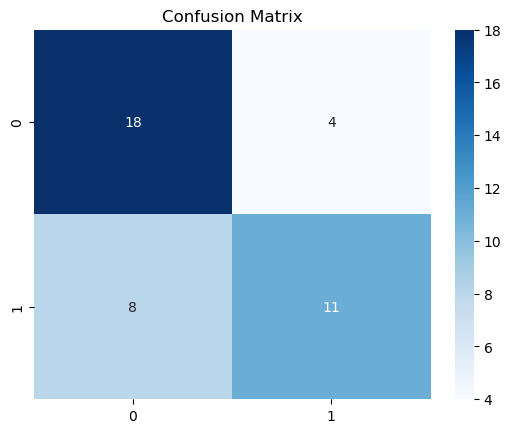

In [8]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


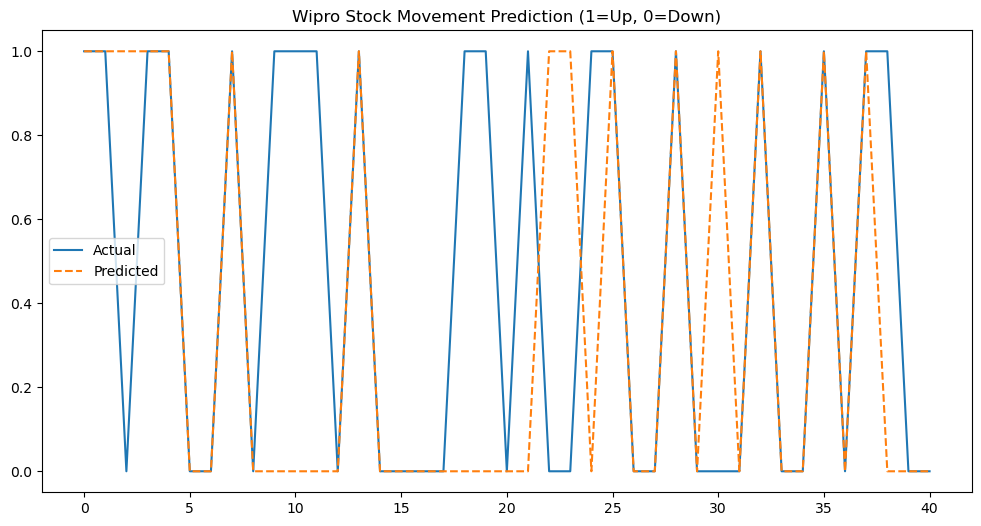

In [9]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:50], label="Actual")
plt.plot(y_pred[:50], label="Predicted", linestyle="dashed")
plt.legend()
plt.title("Wipro Stock Movement Prediction (1=Up, 0=Down)")
plt.show()
